In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Kansrekenen cheatsheet

- Kansvariabele (random variable), meestal hoofdletters: $A, B, C, \dots, X, Y, Z$
- De waarde die de kansvariabele kan aannemen, uitgedrukt met kleine letters of als (discrete/continue) waarden: $A=a, B=b, C=0, C=1, C=2, \dots$
- Kans op vereneging (union) van twee gebeurtenissen, $A$ en $B$, oftewel de kans op $A$ **of** $B$:
$$
  p(A \text{ of } B) = p(A \lor B) = p(A) + p(B) - p(A \land B)
$$
- Als er geen overlap is tussen $A$ en $B$, dan versimpeld deze regel naar 
$$
  p(A \lor B) = p(A) + p(B)
$$
- *Joint* kans van twee gebeurtenissen (product rule), $A$ en $B$, oftewel de kans op $A$ **en** $B$:
$$
  p(A \text{ en } B) = p(A \land B) = p(A, B) = p(A) p(B \;|\; A) = p(B) p(A \;|\; B)
$$
- Marginale kans (sum rule), gegeven $p(A, B)$, dan is de kans op $p(A)$:
$$
  p(A) = \sum_{b \in B} p(A, B=b) = \sum_{b \in B} p(A \;|\; B=b)p(B=b)
$$
- Ketting regel (chain rule), gegeven $N$ random variabelen, $X_1, X_2, \dots, X_N$, dan is de joint distributie $p(X_1, X_2, \dots, X_N)$. Deze kunnen we ontleden met de ketting regel:
$$
  p(X_1, X_2, \dots, X_N) = p(X_1) p(X_2 \;|\; X_1) p(X_3 \;|\; X_1, X_2) \dots p(X_N \;|\; X_1, \dots X_{N-1})
$$

## Regel van Bayes (Bayes' Rule)

- We weten dat de kans op $A$ *en* $B$ hetzelfde is als de kans op $B$ *en* $A$. 
- In kansnotatie krijgen we: 
\begin{align*}
    p(A, B) &= p(B, A)\\[1em]
    p(A \;|\; B)p(B) &= p(B \;|\;A) p(A)\qquad \text{Ketting regel}\\[1em]
    p(A \;|\; B) &= \dfrac{p(B \;|\;A) p(A)}{p(B)} \qquad \text{Regel van Bayes}
\end{align*}
- Met de regel van Bayes kunnen we een voorwaardelijke kans **omdraaien** en deze berekenen

### Voorbeeld:
Een vrouw besluit zich te testen voor borst kanker. Als de test **positief** is, wat is dan de kans dat de vrouw kanker heeft?

Laten we zeggen dat als je kanker hebt, dan zal de test 80% van de tijd positief zijn:
$$
    p(T=true \;|\; C=true) = 0.8
$$
Waarbij:
- $T$ de gebeurtenis is dat men zich wel of niet laat testen
- $C$ de gebeurtenis is dat men wel of niet kanker heeft

#### Stel de test is positief, wat is dan de kans dat de vrouw kanker heeft?

Laten we verder zeggen dat de kans op borstkanker gelijk is aan:
$$
    p(C=true) = 0.004
$$
en de **false positive rate** (false alarm) gelijk staat aan:
$$
    p(T=true\;|\;C=false) = 0.1
$$
Dit is de kans dat de test positief is terwijl de vrouw geen borstkanker heeft.

We kunnen nu **Bayes' rule** toepassen om de gewenste kans te berekenen: 
\begin{align*}
    p(C=true \;|\; T=true) &= \dfrac{p(T=true \;|\; C=true) p(C=true)}{p(T=true)} = \dfrac{p(T=true \;|\; C=true) p(C=true)}{\sum_{c \in C} p(T=true \;|\; C=c) p(C=c)}\\[2em] 
    &= \dfrac{p(T=true \;|\; C=true) p(C=true)}{p(T=true \;|\; C=true) p(C=true) + p(T=true \;|\; C=false) p(C=false)}
\end{align*}

In [2]:
# kans op borstkanker p(C)
p_C = np.array([0.996, 0.004])

# kans op test resultaat gegeven borstkanker p(T | C)
p_T_C = np.array([
    [0.9, 0.1], # p(T | C = false)
    [0.2, 0.8], # p(T | C = true)
])

(p_T_C[1, 1] * p_C[1]) / np.sum(p_T_C[:, 1] * p_C)

0.0311284046692607

Dus de kans op borstkanker gegeven dat de test positief uitkomt is 3%, geen reden tot paniek :)

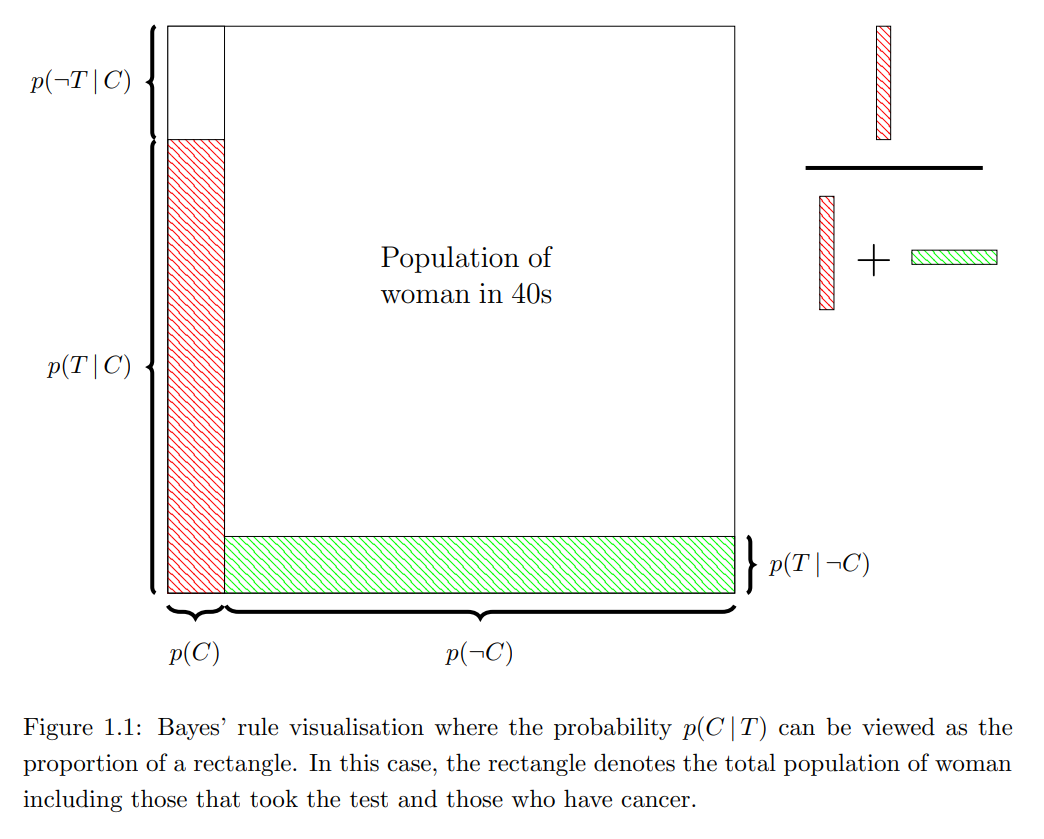

# Bayesian Network

Definitie van een Bayesiaans netwerk

$$
    p(X_1, X_2, \dots, X_N) = \prod_{i=1}^N p(X_i \;|\; \text{parents}(X_i))
$$

Waarbij parents($X_i$) de **parents** zijn van $X_i$, oftewel, de voorwaardelijke kansvariabelen.

### Voorbeeld

- pip install [pyagrum](https://pyagrum.readthedocs.io/en/latest/#)
- installeer [Graphviz](https://graphviz.org/download/) voor visuele weergave van BNs

In [4]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn = gum.fastBN('Burglary->Alarm<-Earthquake;JohnCalls<-Alarm->MaryCalls')

bn.cpt('Burglary')[:] = [0.999, 0.001]
bn.cpt('Earthquake')[:] = [0.998, 0.002]

bn.cpt('Alarm')[{'Burglary': 1, 'Earthquake': 1}] = [0.2, 0.8]
bn.cpt('Alarm')[{'Burglary': 1, 'Earthquake': 0}] = [0.3, 0.7]
bn.cpt('Alarm')[{'Burglary': 0, 'Earthquake': 1}] = [0.85, 0.15]
bn.cpt('Alarm')[{'Burglary': 0, 'Earthquake': 0}] = [0.99, 0.01]

bn.cpt('JohnCalls')[{'Alarm': 1}] = [0.1, 0.9]
bn.cpt('JohnCalls')[{'Alarm': 0}] = [0.95, 0.05]

bn.cpt('MaryCalls')[{'Alarm': 1}] = [0.25, 0.75]
bn.cpt('MaryCalls')[{'Alarm': 0}] = [0.99, 0.01]

bn

(pyAgrum.BayesNet<double>@0x5f2fec428e20) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 10, mem: 160o}

Zonder bewijs wordt de marginale kans van iedere variabele berekent

Bijv. kans dat het alarm afgaat:
\begin{align*}
    p(A=1) &= \sum_{B, E, J, M} p(A=1, B, E, J, M)\\
    &= \sum_{B, E, J, M} p(B) p(E) p(A=1 | B, E) p(J | A=1) p(M | A=1)\\
    &= \sum_{M, J} p(J | A=1) p(M | A=1) \sum_{B, E} p(B) p(E) p(A=1 | B, E) 
\end{align*}

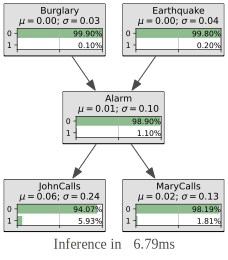

In [5]:
gnb.showInference(bn, evs={})

Als we nu bewijs introduceren, dan zien we dat de kanswaarden veranderen. 

#### Kans op inbraak als John en Mary allebei bellen?

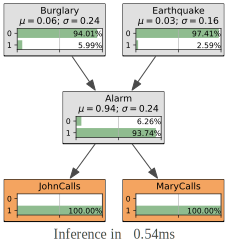

In [6]:
gnb.showInference(bn, evs={'JohnCalls': 1, 'MaryCalls': 1})

#### Kans dat John belt als er ingebroken wordt?

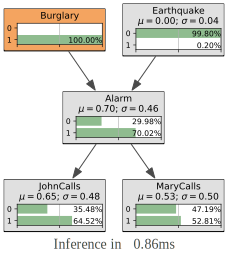

In [7]:
gnb.showInference(bn, evs={'Burglary': 1})

#### Kans op inbraak als we weten dat er geen aardbeving is, het alarm afgaat, John niet belt, en Mary wel belt?

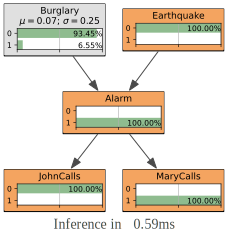

In [8]:
evs = {
    'Earthquake': 0,
    'Alarm': 1,
    'JohnCalls': 0,
    'MaryCalls': 1
}

gnb.showInference(bn, evs=evs)

## Genereren van data

In [59]:
df, logl = gum.generateSample(bn, 1000)

df = df.astype('int')

df

,Alarm,JohnCalls,MaryCalls,Burglary,Earthquake
0,0,0,0,0,0
1,0,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
995,0,0,0,0,0
996,0,0,0,0,0
997,0,0,0,0,0
998,0,0,0,0,0


In [61]:
# p(Alarm | Earthquake = 0, Burglary = 0)
conditioned = df[
    (df['Earthquake'] == 0) &
    (df['Burglary'] == 0)
]['Alarm']

conditioned.value_counts(normalize=True)

Alarm
0    0.987964
1    0.012036
Name: proportion, dtype: float64